Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
✅ Dataset found at /content/drive/My Drive/projectoutput/
Found 317 images belonging to 2 classes.
Found 79 images belonging to 2 classes.
🚀 Starting training...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5789 - loss: 1.0874

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.5918 - loss: 1.0845 - val_accuracy: 0.7595 - val_loss: 0.7019
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6725 - loss: 0.7210 - val_accuracy: 0.7089 - val_loss: 0.5877
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6711 - loss: 0.6819 - val_accuracy: 0.7595 - val_loss: 0.6075
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7407 - loss: 0.6130 - val_accuracy: 0.7722 - val_loss: 0.6177
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7551 - loss: 0.5029 - val_accuracy: 0.7722 - val_loss: 0.5802
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7979 - loss: 0.4966 - val_accuracy: 0.7468 - val_loss: 0.6178
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7849 - loss: 0.4526 - val_accuracy: 0.7468 - val_loss: 0.6066
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7780 - loss: 0.4827 - val_accuracy: 0.7595 - val_loss: 0.6004
Epoch 9/15
5/5 ━━━━━━━━

✅ Model saved to Google Drive!


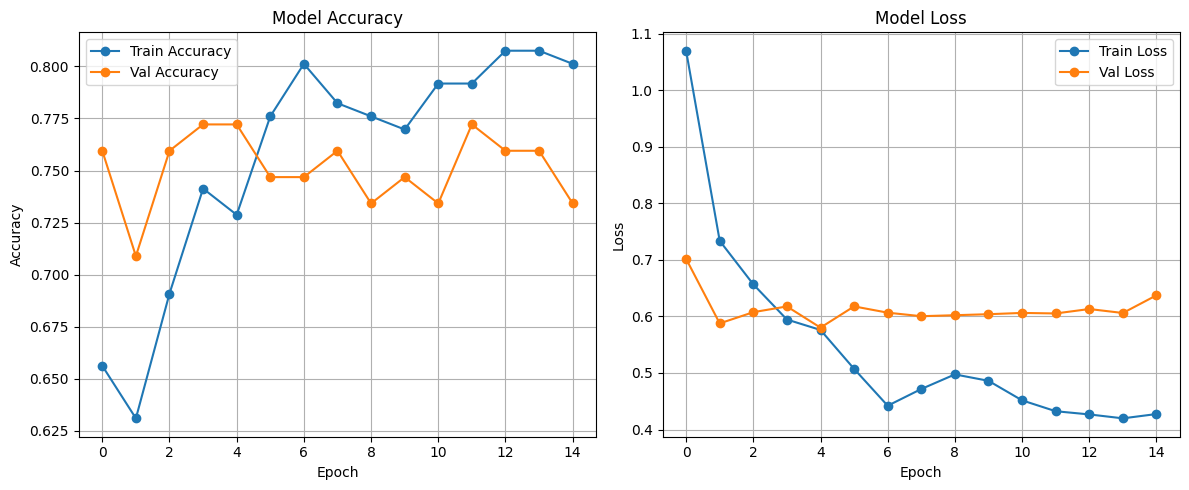

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 322ms/step - accuracy: 0.7563 - loss: 0.6246
📊 Final Validation Accuracy: 0.7595
📉 Final Validation Loss: 0.6181
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step


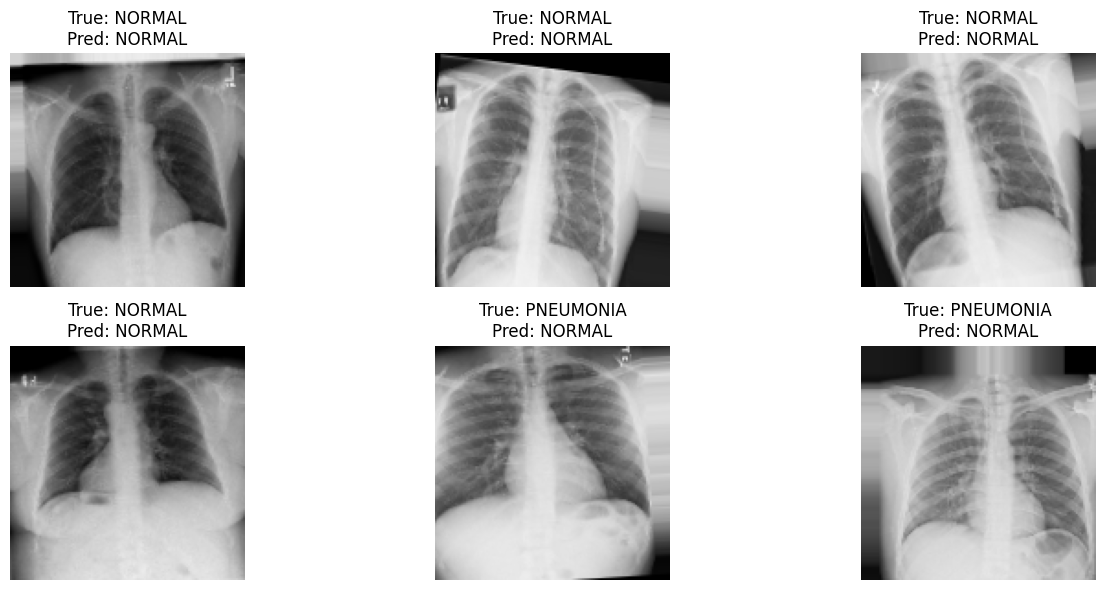

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Check if GPU is available
print("✅ GPU Available:", tf.config.list_physical_devices('GPU'))

# Step 3: Set dataset path
dataset_path = "/content/drive/My Drive/projectoutput/"

# Step 4: Check dataset
if not os.path.exists(dataset_path):

    print(f"❌ Dataset path not found: {dataset_path}")
else:
    print(f"✅ Dataset found at {dataset_path}")

# Step 5: Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)
test_datagen = ImageDataGenerator(rescale=1./255)

# Step 6: Load data
train_generator = train_datagen.flow_from_directory(
    dataset_path + "train",
    target_size=(128, 128),
    batch_size=64,
    class_mode="binary",
    subset="training"
)
val_generator = train_datagen.flow_from_directory(
    dataset_path + "train",
    target_size=(128, 128),
    batch_size=64,
    class_mode="binary",
    subset="validation"
)

# Step 7: Load MobileNetV2
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

# Step 8: Custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Step 9: Compile
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Step 10: Train
print("🚀 Starting training...")
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)

# Step 11: Save model
model.save("/content/drive/My Drive/chest_xray_model_optimized.h5")
print("✅ Model saved to Google Drive!")

# Step 12: Accuracy & Loss Curves
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy", marker='o')
plt.plot(history.history["val_accuracy"], label="Val Accuracy", marker='o')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss", marker='o')
plt.plot(history.history["val_loss"], label="Val Loss", marker='o')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 13: Final Evaluation
val_loss, val_acc = model.evaluate(val_generator)
print(f"📊 Final Validation Accuracy: {val_acc:.4f}")
print(f"📉 Final Validation Loss: {val_loss:.4f}")

# Optional: Display a batch of predictions
x_batch, y_batch = next(val_generator)
y_pred = model.predict(x_batch) > 0.5

plt.figure(figsize=(14, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_batch[i])
    plt.title(f"True: {'PNEUMONIA' if y_batch[i] == 1 else 'NORMAL'}\nPred: {'PNEUMONIA' if y_pred[i] else 'NORMAL'}")
    plt.axis("off")
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
✅ Dataset found at /content/drive/My Drive/projectoutput/
Found 317 images belonging to 2 classes.
Found 79 images belonging to 2 classes.
🚀 Training...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6177 - loss: 0.9954   

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.6278 - loss: 0.9782 - val_accuracy: 0.7595 - val_loss: 0.6483
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7484 - loss: 0.7171 - val_accuracy: 0.6962 - val_loss: 0.6103
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7057 - loss: 0.7198 - val_accuracy: 0.7722 - val_loss: 0.5970
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7446 - loss: 0.5408 - val_accuracy: 0.7089 - val_loss: 0.5876
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7121 - loss: 0.5729 - val_accuracy: 0.6456 - val_loss: 0.6279
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7390 - loss: 0.5404 - val_accuracy: 0.7468 - val_loss: 0.6188
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7655 - loss: 0.5723 - val_accuracy: 0.7342 - val_loss: 0.6158
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7869 - loss: 0.5149 - val_accuracy: 0.7089 - val_loss: 0.5844
Epoch 9/15
5/5 ━━━━━━━━━

✅ Model saved to Drive!
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step


<Figure size 600x600 with 0 Axes>

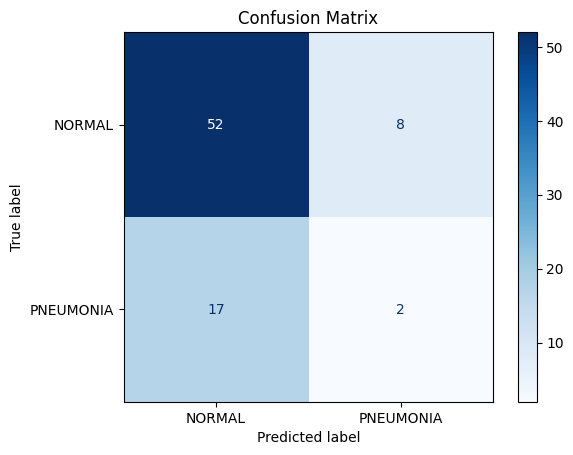

📊 Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.75      0.87      0.81        60
   PNEUMONIA       0.20      0.11      0.14        19

    accuracy                           0.68        79
   macro avg       0.48      0.49      0.47        79
weighted avg       0.62      0.68      0.65        79



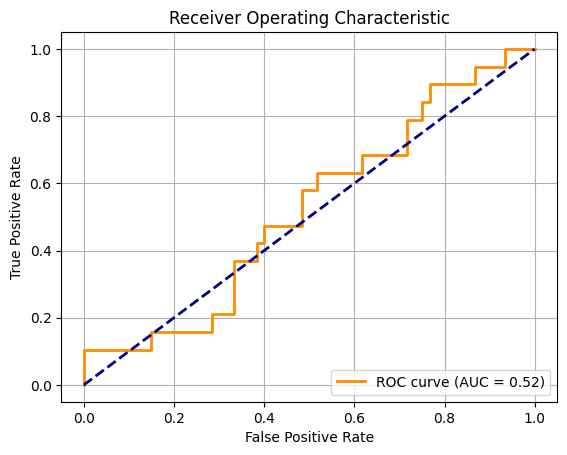

🎯 ROC-AUC Score: 52.28%


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Imports
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)

# Step 3: Check GPU
print("✅ GPU Available:", tf.config.list_physical_devices('GPU'))

# Step 4: Dataset Path
dataset_path = "/content/drive/My Drive/projectoutput/"
if not os.path.exists(dataset_path):
    print(f"❌ Dataset path not found: {dataset_path}")
else:
    print(f"✅ Dataset found at {dataset_path}")

# Step 5: Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path + "train",
    target_size=(128, 128),
    batch_size=64,
    class_mode="binary",
    subset="training",
    shuffle=True
)
val_generator = train_datagen.flow_from_directory(
    dataset_path + "train",
    target_size=(128, 128),
    batch_size=64,
    class_mode="binary",
    subset="validation",
    shuffle=False
)

# Step 6: Load MobileNetV2
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Step 7: Compile
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Step 8: Train
print("🚀 Training...")
history = model.fit(train_generator, validation_data=val_generator, epochs=15)

# Step 9: Save Model
model.save("/content/drive/My Drive/chest_xray_model.h5")
print("✅ Model saved to Drive!")

# Step 10: Evaluate Metrics
val_generator.reset()
y_true = val_generator.classes
y_pred_prob = model.predict(val_generator, verbose=1)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NORMAL", "PNEUMONIA"])
plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Classification Report
print("📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["NORMAL", "PNEUMONIA"]))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = roc_auc_score(y_true, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"🎯 ROC-AUC Score: {roc_auc * 100:.2f}%")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


✅ Model loaded successfully!
🖼️ Full Pipeline Visualization


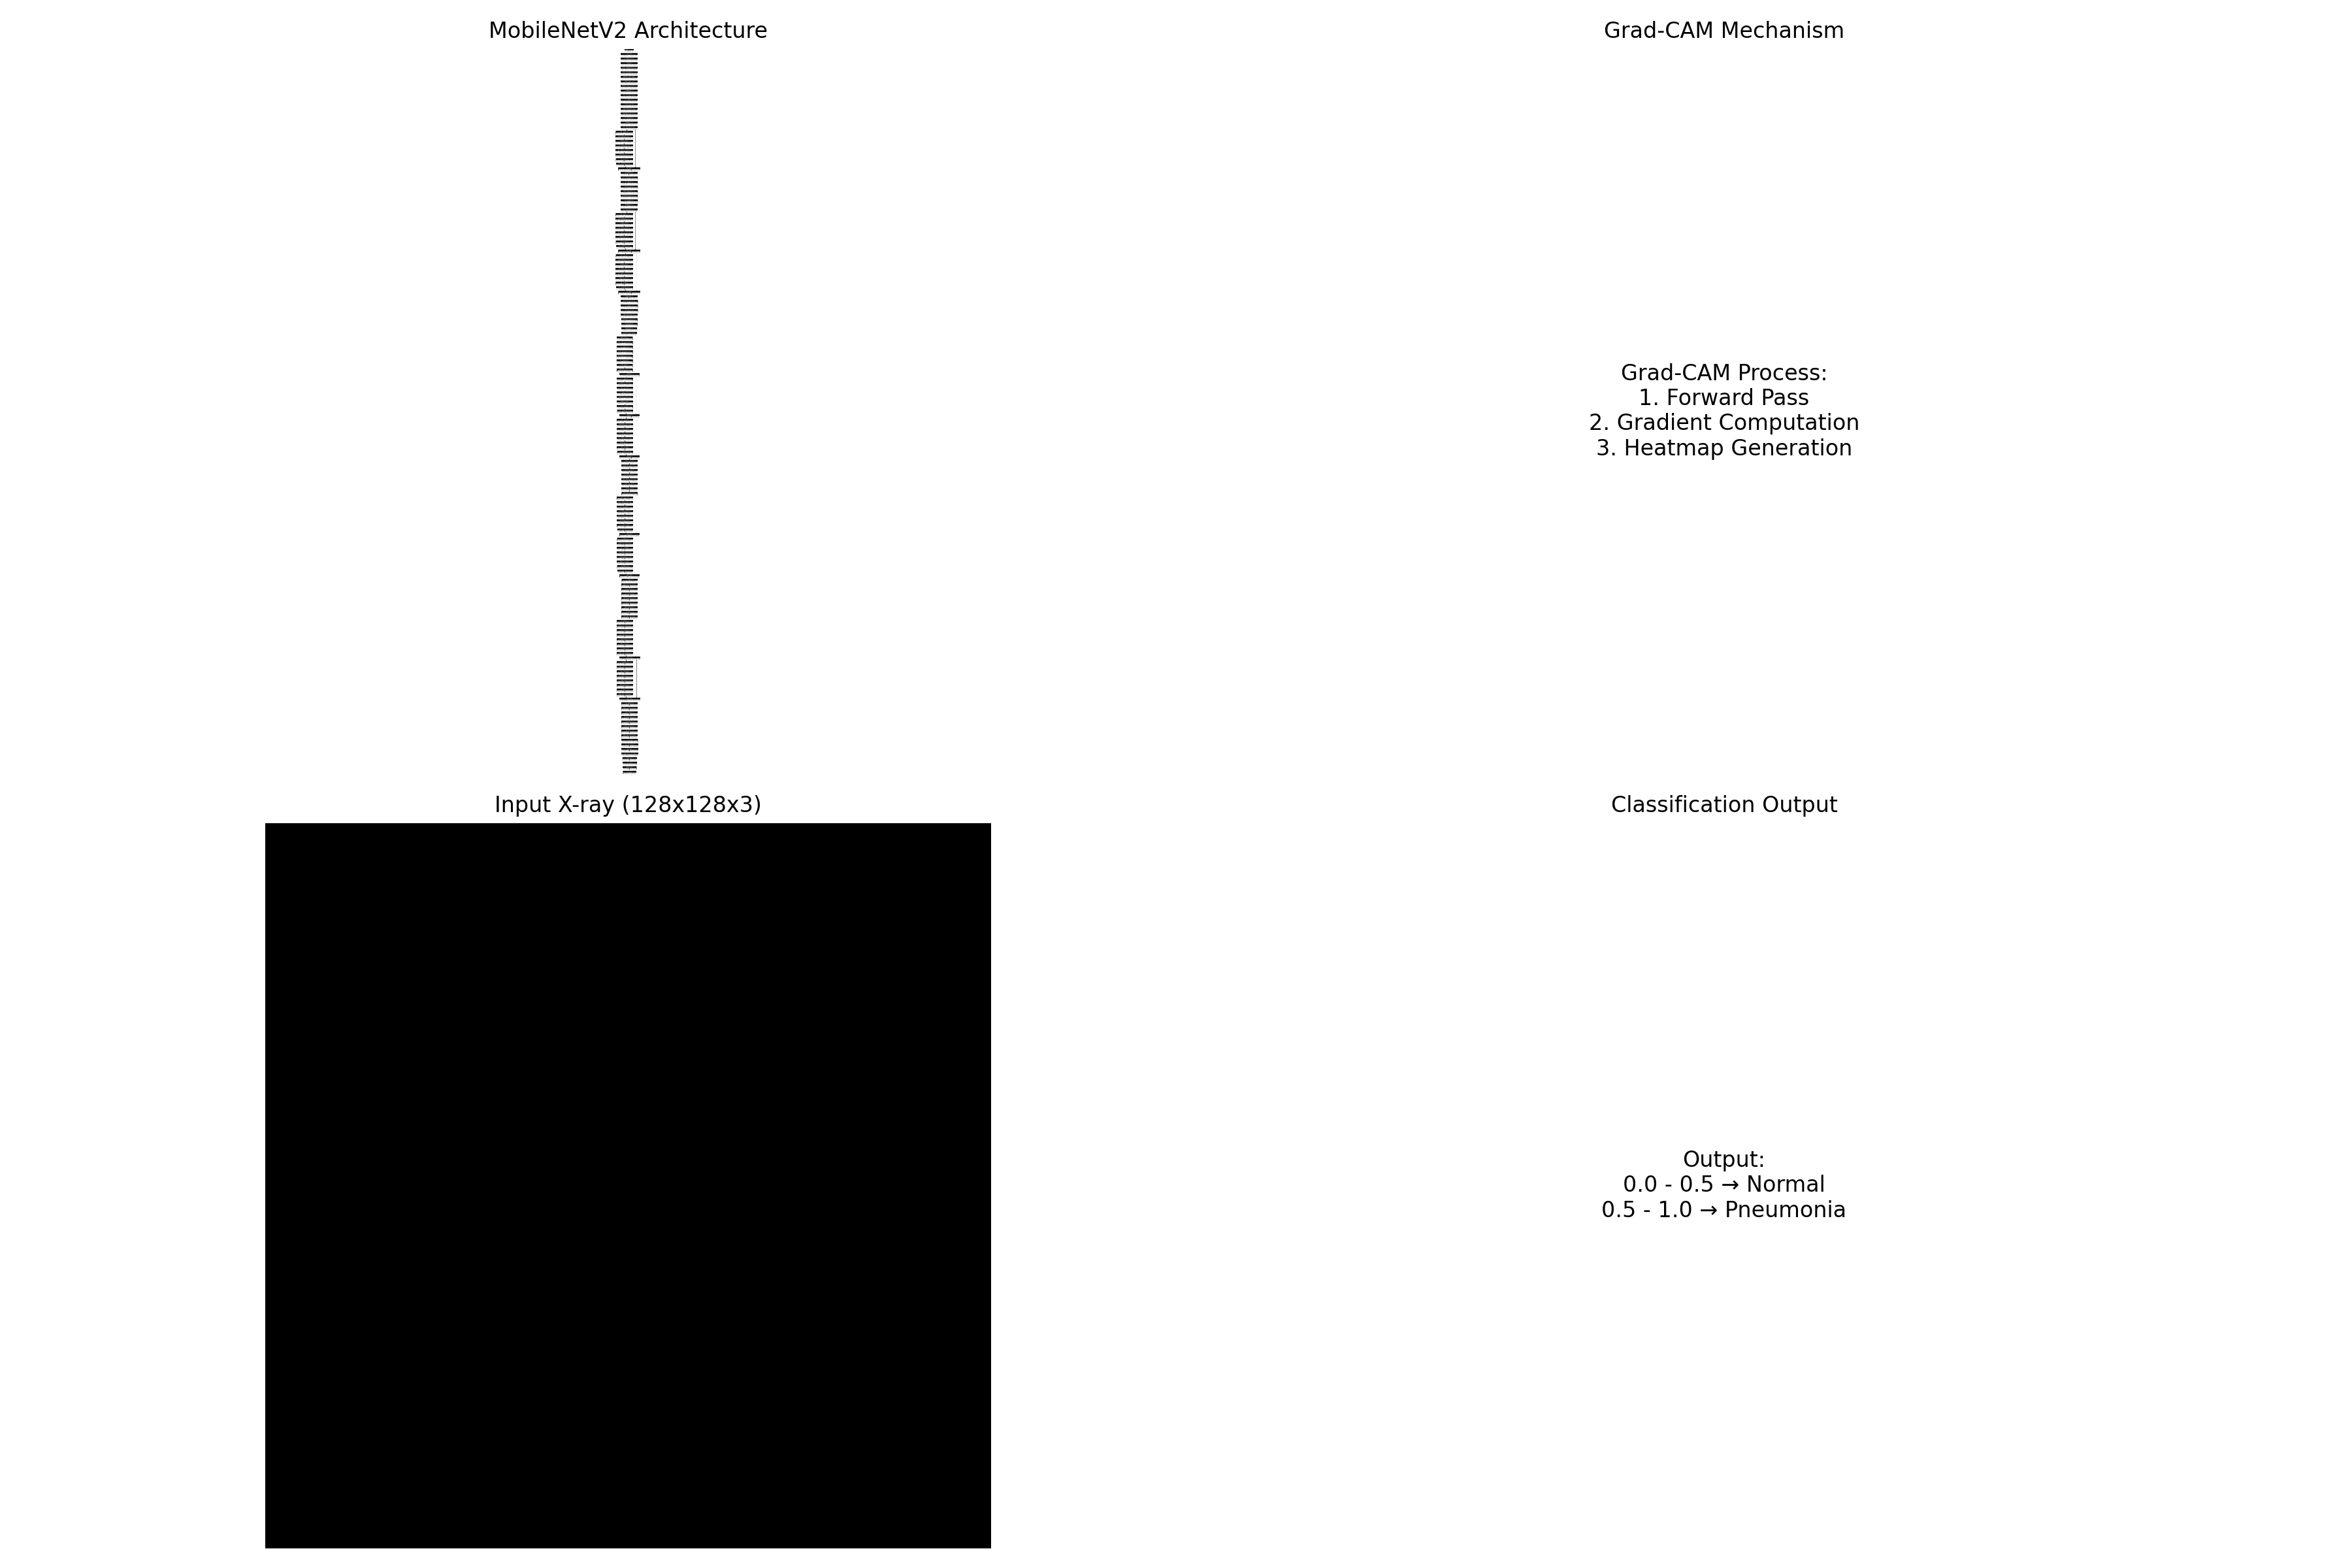


🔍 Detailed Model Architecture


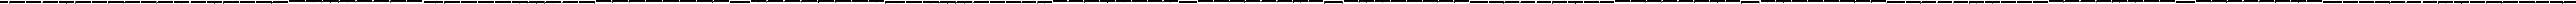


📥 To download diagrams, run the lines below:
files.download('full_pipeline.png')
files.download('detailed_architecture.png')


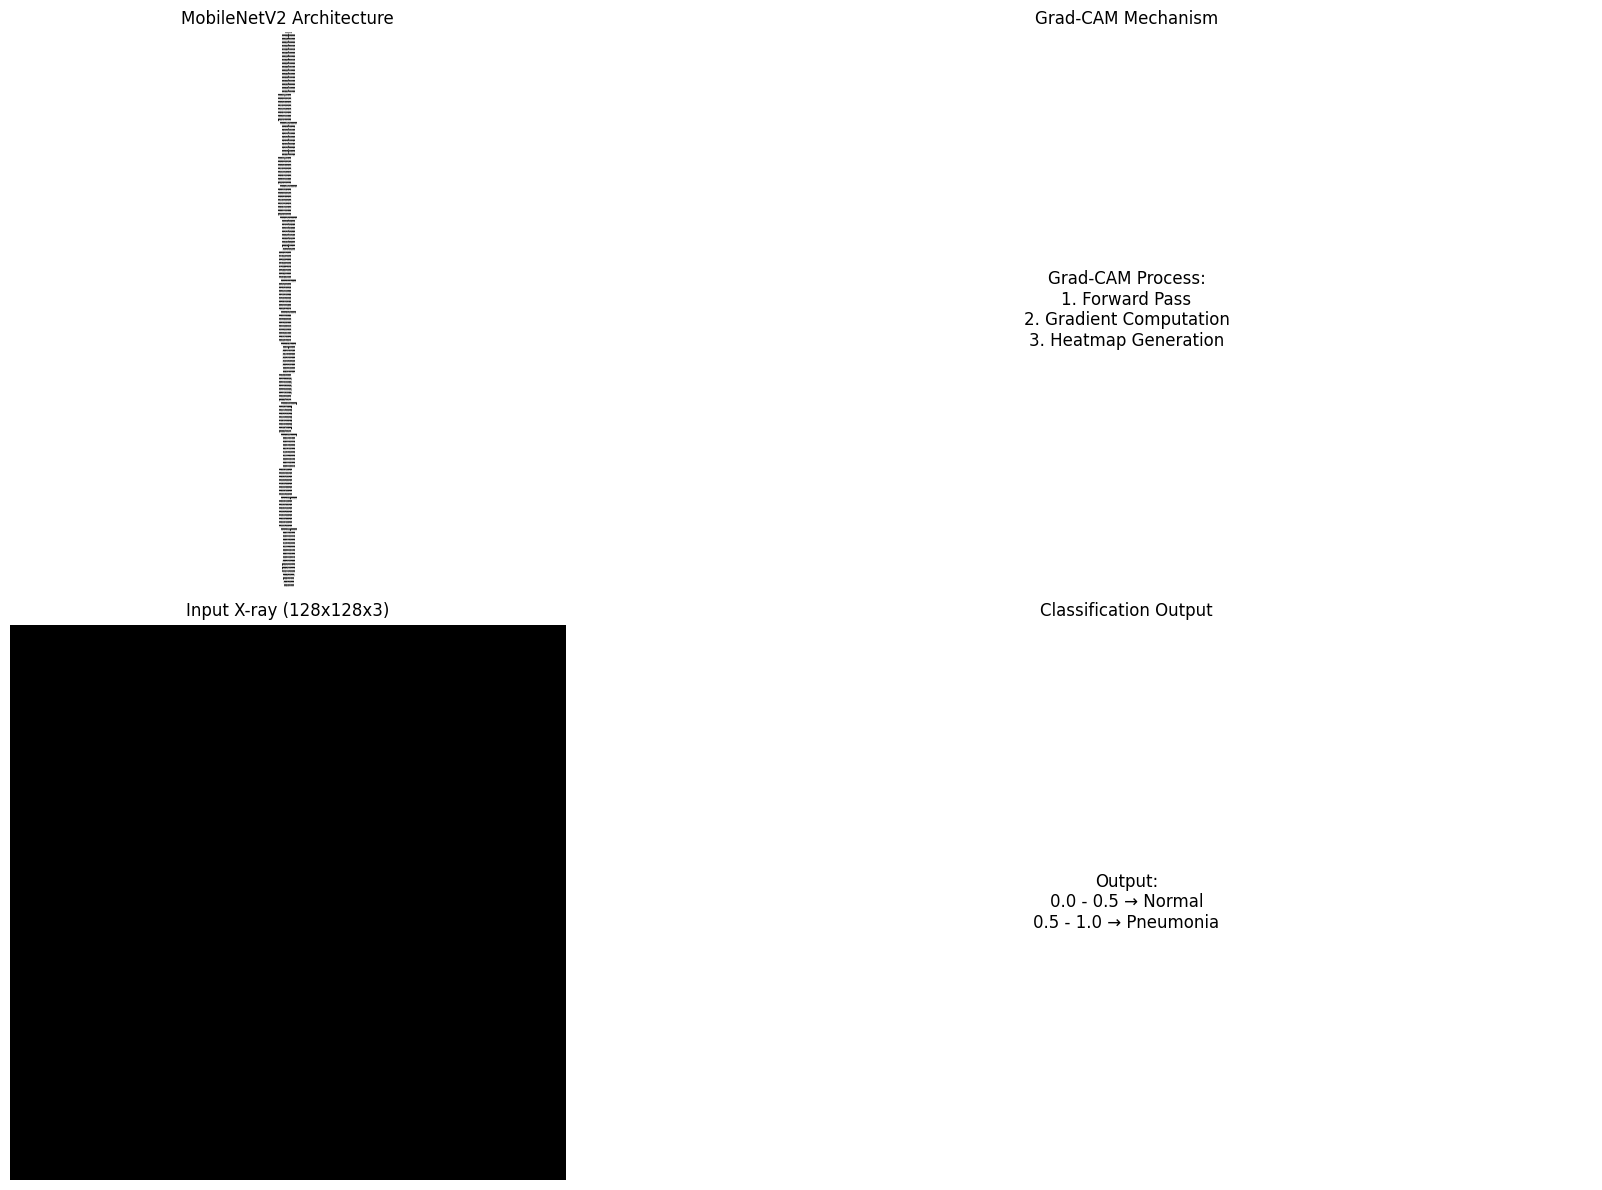

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

# === LOAD MODEL ===
model_path = "/content/drive/My Drive/chest_xray_model_optimized.h5"
model = load_model(model_path)
print("✅ Model loaded successfully!")

# === FULL PIPELINE VISUALIZATION ===
def visualize_full_pipeline():
    # Save model architecture diagram to file first
    plot_model(model, to_file='model_arch.png', show_shapes=True, show_layer_names=True)

    # Create composite visualization
    fig = plt.figure(figsize=(18, 12))

    # 1. Model Architecture
    plt.subplot(2, 2, 1)
    model_img = plt.imread('model_arch.png')
    plt.imshow(model_img)
    plt.title("MobileNetV2 Architecture")
    plt.axis('off')

    # 2. Grad-CAM Diagram
    plt.subplot(2, 2, 2)
    plt.text(0.5, 0.5,
             "Grad-CAM Process:\n1. Forward Pass\n2. Gradient Computation\n3. Heatmap Generation",
             ha='center', va='center', fontsize=12)
    plt.title("Grad-CAM Mechanism")
    plt.axis('off')

    # 3. Sample Input
    plt.subplot(2, 2, 3)
    sample_img = np.zeros((128, 128, 3))
    plt.imshow(sample_img)
    plt.title("Input X-ray (128x128x3)")
    plt.axis('off')

    # 4. Output Explanation
    plt.subplot(2, 2, 4)
    plt.text(0.5, 0.5,
             "Output:\n0.0 - 0.5 → Normal\n0.5 - 1.0 → Pneumonia",
             ha='center', va='center', fontsize=12)
    plt.title("Classification Output")
    plt.axis('off')

    plt.tight_layout()
    fig.savefig('full_pipeline.png', dpi=200)
    display(Image(filename='full_pipeline.png', width=800))

# === DETAILED ARCHITECTURE ===
def detailed_model_diagram():
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(128, 128, 3),
        include_top=False,
        weights='imagenet'
    )

    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    detailed_model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

    plot_model(
        detailed_model,
        to_file='detailed_architecture.png',
        show_shapes=True,
        show_layer_names=True,
        rankdir='LR',  # Horizontal layout
        dpi=150
    )
    display(Image(filename='detailed_architecture.png', width=1000))

# === RUN VISUALIZATION ===
print("🖼️ Full Pipeline Visualization")
visualize_full_pipeline()

print("\n🔍 Detailed Model Architecture")
detailed_model_diagram()

# === DOWNLOAD OPTIONS ===
from google.colab import files
print("\n📥 To download diagrams, run the lines below:")
print("files.download('full_pipeline.png')")
print("files.download('detailed_architecture.png')")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
✅ Dataset found at /content/drive/My Drive/projectoutput/
Found 317 images belonging to 2 classes.
Found 79 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
4/5 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6840 - loss: 0.8155   

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.6926 - loss: 0.8063 - val_accuracy: 0.7468 - val_loss: 0.5906
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6946 - loss: 0.7208 - val_accuracy: 0.6709 - val_loss: 0.6725
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7532 - loss: 0.5564 - val_accuracy: 0.7089 - val_loss: 0.6484
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7758 - loss: 0.5139 - val_accuracy: 0.7468 - val_loss: 0.6729
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7476 - loss: 0.5277 - val_accuracy: 0.6962 - val_loss: 0.6571


✅ Optimized model saved successfully in Google Drive!


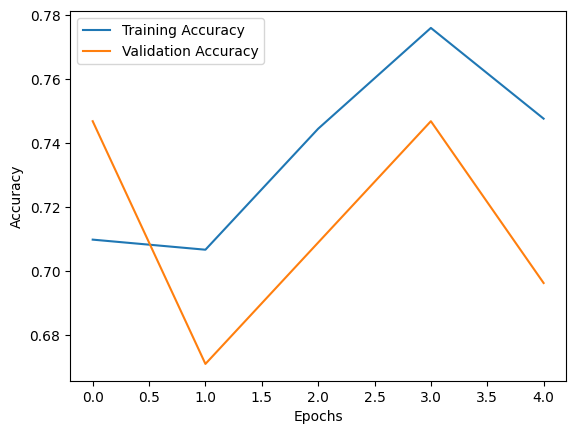

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Step 2: Check if GPU is available
print("✅ GPU Available:", tf.config.list_physical_devices('GPU'))

# Step 3: Set dataset directory (Ensure correct folder structure in Google Drive)
dataset_path = "/content/drive/My Drive/projectoutput/"

# Step 4: Ensure dataset exists
if not os.path.exists(dataset_path):
    print(f"❌ Dataset path not found: {dataset_path}")
    print("Check if your dataset is uploaded and correctly placed in Google Drive.")
else:
    print(f"✅ Dataset found at {dataset_path}")

# Step 5: Create Data Generators (Optimized with smaller images)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data used for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Step 6: Load data with smaller image size (Faster processing)
train_generator = train_datagen.flow_from_directory(
    dataset_path + "train",
    target_size=(128, 128),  # Reduced size
    batch_size=64,  # Larger batch size for speed
    class_mode="binary",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    dataset_path + "train",
    target_size=(128, 128),  # Reduced size
    batch_size=64,
    class_mode="binary",
    subset="validation"
)

# Step 7: Load MobileNetV2 for Transfer Learning (Lighter Model)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze base model layers

# Step 8: Add Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Regularization
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid")(x)

# Step 9: Create Model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 10: Compile Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Step 11: Train the Model (Optimized for Speed)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5  # Reduced epochs for speed
)

# Step 12: Save the Trained Model
model.save("/content/drive/My Drive/chest_xray_model_optimized.h5")
print("✅ Optimized model saved successfully in Google Drive!")

# Step 13: Plot Accuracy Curves
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


✅ Model loaded successfully!
✅ Directory found: /content/drive/My Drive/projectoutput/val/NORMAL
✅ Selected image: 00008574_003.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


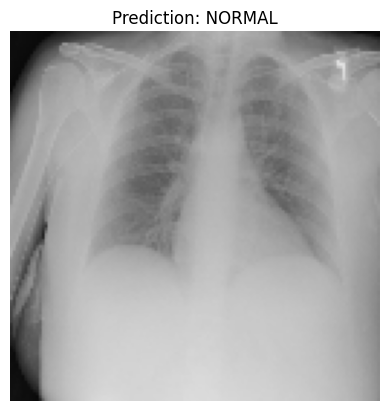

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


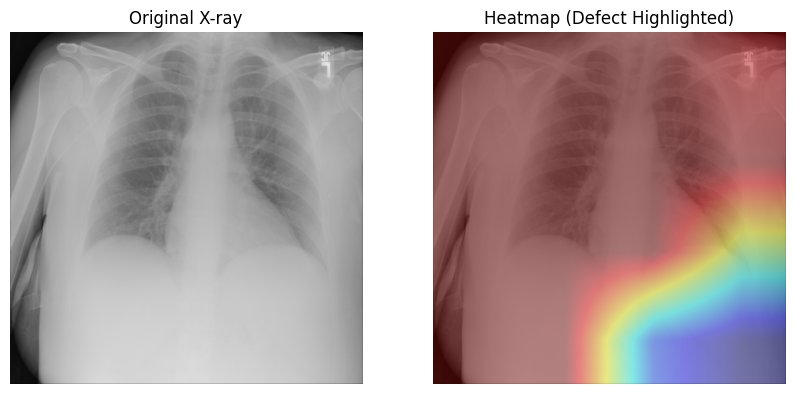

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Step 2: Load the trained model
model_path = "/content/drive/My Drive/chest_xray_model_optimized.h5"
model = load_model(model_path)
print("✅ Model loaded successfully!")

# Step 3: Find an available test image
test_dir = "/content/drive/My Drive/projectoutput/val/NORMAL"  # Change to 'PNEUMONIA' if needed

# Ensure the directory exists
if not os.path.exists(test_dir):
    print(f"❌ Error: Directory '{test_dir}' not found. Check Google Drive path.")
else:
    print(f"✅ Directory found: {test_dir}")

    # List available images
    images = os.listdir(test_dir)

    if len(images) == 0:
        print("❌ No images found in the test folder!")
    else:
        test_img_name = images[0]  # Select first image
        test_img_path = os.path.join(test_dir, test_img_name)
        print(f"✅ Selected image: {test_img_name}")

        # Step 4: Load and preprocess the image
        img = image.load_img(test_img_path, target_size=(128, 128))  # Resize for model
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

        # Step 5: Make a prediction
        prediction = model.predict(img_array)[0][0]

        # Step 6: Display the image
        plt.imshow(img)
        plt.title(f"Prediction: {'PNEUMONIA' if prediction > 0.5 else 'NORMAL'}")
        plt.axis("off")
        plt.show()

        # Step 7: Apply Grad-CAM for visualization
        def apply_gradcam(model, img_path, layer_name='Conv_1'):
            """Apply Grad-CAM to visualize the important regions of an X-ray image."""

            # Load and preprocess the image
            img = image.load_img(img_path, target_size=(128, 128))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

            # Define a new model that outputs feature maps and predictions
            grad_model = tf.keras.models.Model(
                inputs=[model.inputs],
                outputs=[model.get_layer(layer_name).output, model.output]
            )

            # Compute gradients
            with tf.GradientTape() as tape:
                conv_outputs, predictions = grad_model(img_array)
                loss = predictions[:, 0]  # Focus on the first class

            grads = tape.gradient(loss, conv_outputs)
            pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

            # Convert tensors to NumPy arrays
            conv_outputs = conv_outputs.numpy()[0]
            pooled_grads = pooled_grads.numpy()

            # Multiply each channel by its importance
            for i in range(conv_outputs.shape[-1]):
                conv_outputs[:, :, i] *= pooled_grads[i]

            # Generate the heatmap
            heatmap = np.mean(conv_outputs, axis=-1)
            heatmap = np.maximum(heatmap, 0) / np.max(heatmap)  # Normalize
            heatmap = cv2.resize(heatmap, (128, 128))

            return heatmap

        # Generate heatmap
        heatmap = apply_gradcam(model, test_img_path)

        # Step 8: Superimpose heatmap on the original X-ray image
        img = cv2.imread(test_img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

        # Resize heatmap to match image size
        heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

        # Ensure both images have 3 channels
        if len(img.shape) == 2:  # If grayscale, convert to 3-channel
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

        # Normalize and apply colormap
        heatmap = np.uint8(255 * heatmap)
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

        # Blend heatmap with the original image
        superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

        # Step 9: Display the original image with heatmap
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title("Original X-ray")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(superimposed_img)
        plt.title("Heatmap (Defect Highlighted)")
        plt.axis("off")
        plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


✅ Model loaded successfully!
✅ Directory found: /content/drive/My Drive/projectoutput/val/NORMAL
✅ Selected image: 00008574_003.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)
/tmp/ipython-input-11-2847026386.py:113: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


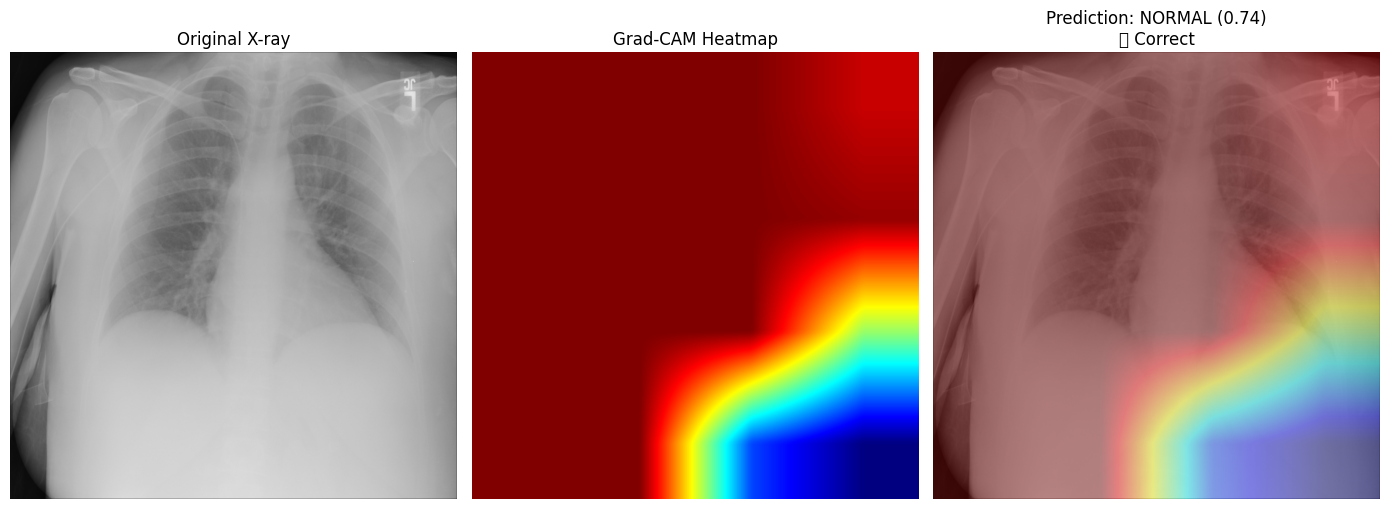

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Step 3: Load the trained model
model_path = "/content/drive/My Drive/chest_xray_model_optimized.h5"
model = load_model(model_path)
print("✅ Model loaded successfully!")

# Step 4: Locate a test image (NORMAL or PNEUMONIA)
test_dir = "/content/drive/My Drive/projectoutput/val/NORMAL"  # Change this to 'PNEUMONIA' if needed

if not os.path.exists(test_dir):
    print(f"❌ Error: Directory '{test_dir}' not found.")
else:
    print(f"✅ Directory found: {test_dir}")
    images = os.listdir(test_dir)

    if len(images) == 0:
        print("❌ No images found in the test folder!")
    else:
        test_img_name = images[0]
        test_img_path = os.path.join(test_dir, test_img_name)
        print(f"✅ Selected image: {test_img_name}")

        # Step 5: Load and preprocess the image
        img = image.load_img(test_img_path, target_size=(128, 128))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        # Step 6: Make a prediction
        prediction = model.predict(img_array)[0][0]
        pred_label = "PNEUMONIA" if prediction > 0.5 else "NORMAL"
        confidence = prediction if prediction > 0.5 else 1 - prediction

        # Step 7: Define Grad-CAM Function
        def apply_gradcam(model, img_path, layer_name='Conv_1'):
            img = image.load_img(img_path, target_size=(128, 128))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0

            grad_model = tf.keras.models.Model(
                inputs=[model.inputs],
                outputs=[model.get_layer(layer_name).output, model.output]
            )

            with tf.GradientTape() as tape:
                conv_outputs, predictions = grad_model(img_array)
                loss = predictions[:, 0]

            grads = tape.gradient(loss, conv_outputs)
            pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

            conv_outputs = conv_outputs.numpy()[0]
            pooled_grads = pooled_grads.numpy()

            for i in range(conv_outputs.shape[-1]):
                conv_outputs[:, :, i] *= pooled_grads[i]

            heatmap = np.mean(conv_outputs, axis=-1)
            heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
            heatmap = cv2.resize(heatmap, (128, 128))
            return heatmap

        # Step 8: Generate Heatmap
        heatmap = apply_gradcam(model, test_img_path)

        # Step 9: Prepare Image and Overlay
        orig_img = cv2.imread(test_img_path)
        orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

        heatmap_resized = cv2.resize(heatmap, (orig_img.shape[1], orig_img.shape[0]))

        if len(orig_img.shape) == 2:
            orig_img = cv2.cvtColor(orig_img, cv2.COLOR_GRAY2RGB)

        heatmap_colored = np.uint8(255 * heatmap_resized)
        heatmap_colored = cv2.applyColorMap(heatmap_colored, cv2.COLORMAP_JET)

        superimposed_img = cv2.addWeighted(orig_img, 0.6, heatmap_colored, 0.4, 0)

        # Step 10: Optional Ground Truth from filename
        true_label = "PNEUMONIA" if "pneumonia" in test_img_name.lower() else "NORMAL"
        correct = (pred_label == true_label)

        # Step 11: Display
        plt.figure(figsize=(14, 6))

        plt.subplot(1, 3, 1)
        plt.imshow(orig_img)
        plt.title("Original X-ray")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(heatmap_colored)
        plt.title("Grad-CAM Heatmap")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(superimposed_img)
        plt.title(f"Prediction: {pred_label} ({confidence:.2f})\n{'✅ Correct' if correct else '❌ Incorrect'}")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

        # Step 12: Optional Save
        # save_path = "/content/drive/My Drive/gradcam_output.png"
        # cv2.imwrite(save_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))
        # print(f"📁 Grad-CAM image saved to: {save_path}")


✅ Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


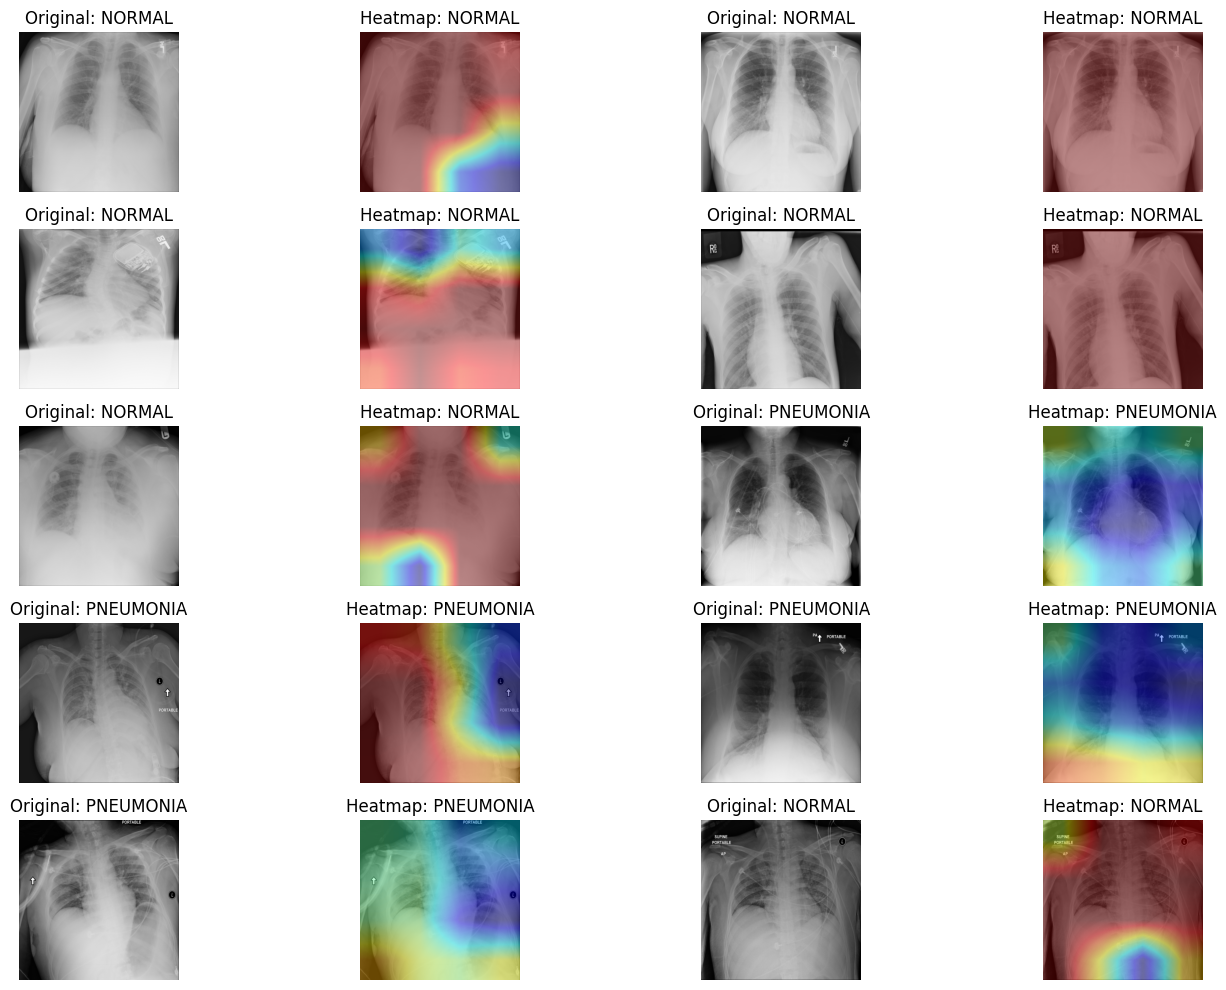

In [ ]:
# Step 1: Mount Google Drive
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Step 2: Load the trained model
model_path = "/content/drive/My Drive/chest_xray_model_optimized.h5"
model = load_model(model_path)
print("✅ Model loaded successfully!")

# Step 3: Select 5 NORMAL & 5 PNEUMONIA images
normal_dir = "/content/drive/My Drive/projectoutput/val/NORMAL"
pneumonia_dir = "/content/drive/My Drive/projectoutput/val/PNEUMONIA"

def get_images(directory, count=5):
    """Fetches a set number of images from a directory."""
    if os.path.exists(directory):
        images = os.listdir(directory)[:count]  # Get the first 'count' images
        return [os.path.join(directory, img) for img in images]
    else:
        print(f"❌ Directory not found: {directory}")
        return []

# Fetch images
normal_images = get_images(normal_dir, 5)
pneumonia_images = get_images(pneumonia_dir, 5)

# Combine both sets
all_images = normal_images + pneumonia_images

# Step 4: Apply Grad-CAM
def apply_gradcam(model, img_path, layer_name='Conv_1'):
    """Apply Grad-CAM to visualize the important regions of an X-ray image."""

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

    # Define a new model that outputs feature maps and predictions
    grad_model = tf.keras.models.Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    # Compute gradients
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]  # Focus on the first class

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Convert tensors to NumPy arrays
    conv_outputs = conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()

    # Multiply each channel by its importance
    for i in range(conv_outputs.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    # Generate the heatmap
    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)  # Normalize
    heatmap = cv2.resize(heatmap, (128, 128))

    return heatmap

# Step 5: Process and Display Images
plt.figure(figsize=(15, 10))  # Set figure size

for i, img_path in enumerate(all_images):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

    # Make a prediction
    prediction = model.predict(img_array)[0][0]
    label = "PNEUMONIA" if prediction > 0.5 else "NORMAL"

    # Generate Grad-CAM heatmap
    heatmap = apply_gradcam(model, img_path)

    # Load original image
    orig_img = cv2.imread(img_path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Resize heatmap to match image size
    heatmap = cv2.resize(heatmap, (orig_img.shape[1], orig_img.shape[0]))

    # Ensure grayscale images are converted to RGB
    if len(orig_img.shape) == 2:
        orig_img = cv2.cvtColor(orig_img, cv2.COLOR_GRAY2RGB)

    # Normalize and apply colormap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Blend heatmap with the original image
    superimposed_img = cv2.addWeighted(orig_img, 0.6, heatmap, 0.4, 0)

    # Plot original image
    plt.subplot(5, 4, 2 * i + 1)
    plt.imshow(orig_img)
    plt.title(f"Original: {label}")
    plt.axis("off")

    # Plot heatmap overlay
    plt.subplot(5, 4, 2 * i + 2)
    plt.imshow(superimposed_img)
    plt.title(f"Heatmap: {label}")
    plt.axis("off")

# Step 6: Show the results
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, load_model
import tensorflow as tf
from IPython.display import Image, display
import matplotlib.pyplot as plt
import numpy as np
model_path = "/content/drive/My Drive/chest_xray_model_optimized.h5"

# 1. Enhanced Model Visualization
def visualize_full_pipeline():
    # Load your model (replace with actual model loading if needed)
    model = load_model(model_path)

    # Create a diagram of the full pipeline
    plt.figure(figsize=(18, 12))

    # Model Architecture
    plt.subplot(2, 2, 1)
    plot_model(model, to_file='model_arch.png', show_shapes=True, show_layer_names=True)
    plt.title("MobileNetV2 Architecture")
    plt.axis('off')

    # Grad-CAM Process
    plt.subplot(2, 2, 2)
    grad_cam_diagram = np.zeros((200, 400, 3))
    plt.text(200, 100, "Grad-CAM Process:\n1. Forward pass\n2. Gradient computation\n3. Heatmap generation",
             ha='center', va='center', fontsize=12, color='white')
    plt.title("Grad-CAM Mechanism")
    plt.axis('off')

    # Sample Input/Output
    plt.subplot(2, 2, 3)
    sample_img = np.zeros((128, 128, 3))
    plt.imshow(sample_img)
    plt.title("Input X-ray (128x128x3)")
    plt.axis('off')

    # Prediction Output
    plt.subplot(2, 2, 4)
    plt.text(0.5, 0.5, "Output:\n0.0 - 0.5 = Normal\n0.5 - 1.0 = Pneumonia",
             ha='center', va='center', fontsize=12)
    plt.title("Classification Output")
    plt.axis('off')

    plt.tight_layout()
    plt.savefig('full_pipeline.png', dpi=300, bbox_inches='tight')
    display(Image(filename='full_pipeline.png', width=800))

# 2. Detailed MobileNetV2 Diagram
def detailed_model_diagram():
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(128, 128, 3),
        include_top=False,
        weights='imagenet'
    )

    # Custom layers
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Plot with expanded view
    plot_model(
        model,
        to_file='detailed_architecture.png',
        show_shapes=True,
        show_layer_names=True,
        rankdir='LR',  # Left-to-right layout
        dpi=150,
        expand_nested=True
    )
    display(Image(filename='detailed_architecture.png', width=1000))

# 3. Run visualizations
print("🖼️ Full Pipeline Visualization")
visualize_full_pipeline()

print("\n🔍 Detailed Model Architecture")
detailed_model_diagram()

# 4. Download options
from google.colab import files
print("\n📥 Download diagrams:")
print("1. Full pipeline: files.download('full_pipeline.png')")
print("2. Detailed architecture: files.download('detailed_architecture.png')")

🖼️ Full Pipeline Visualization


In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Load MobileNetV2 base model (without top)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze layers for transfer learning

# Add custom head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=output)

# Plot and save the diagram
plot_model(
    model,
    to_file='model_architecture.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',  # Vertical layout
    dpi=96,
    expand_nested=True
)

print("✅ Diagram saved as 'model_architecture.png'")

✅ Diagram saved as 'model_architecture.png'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


✅ Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


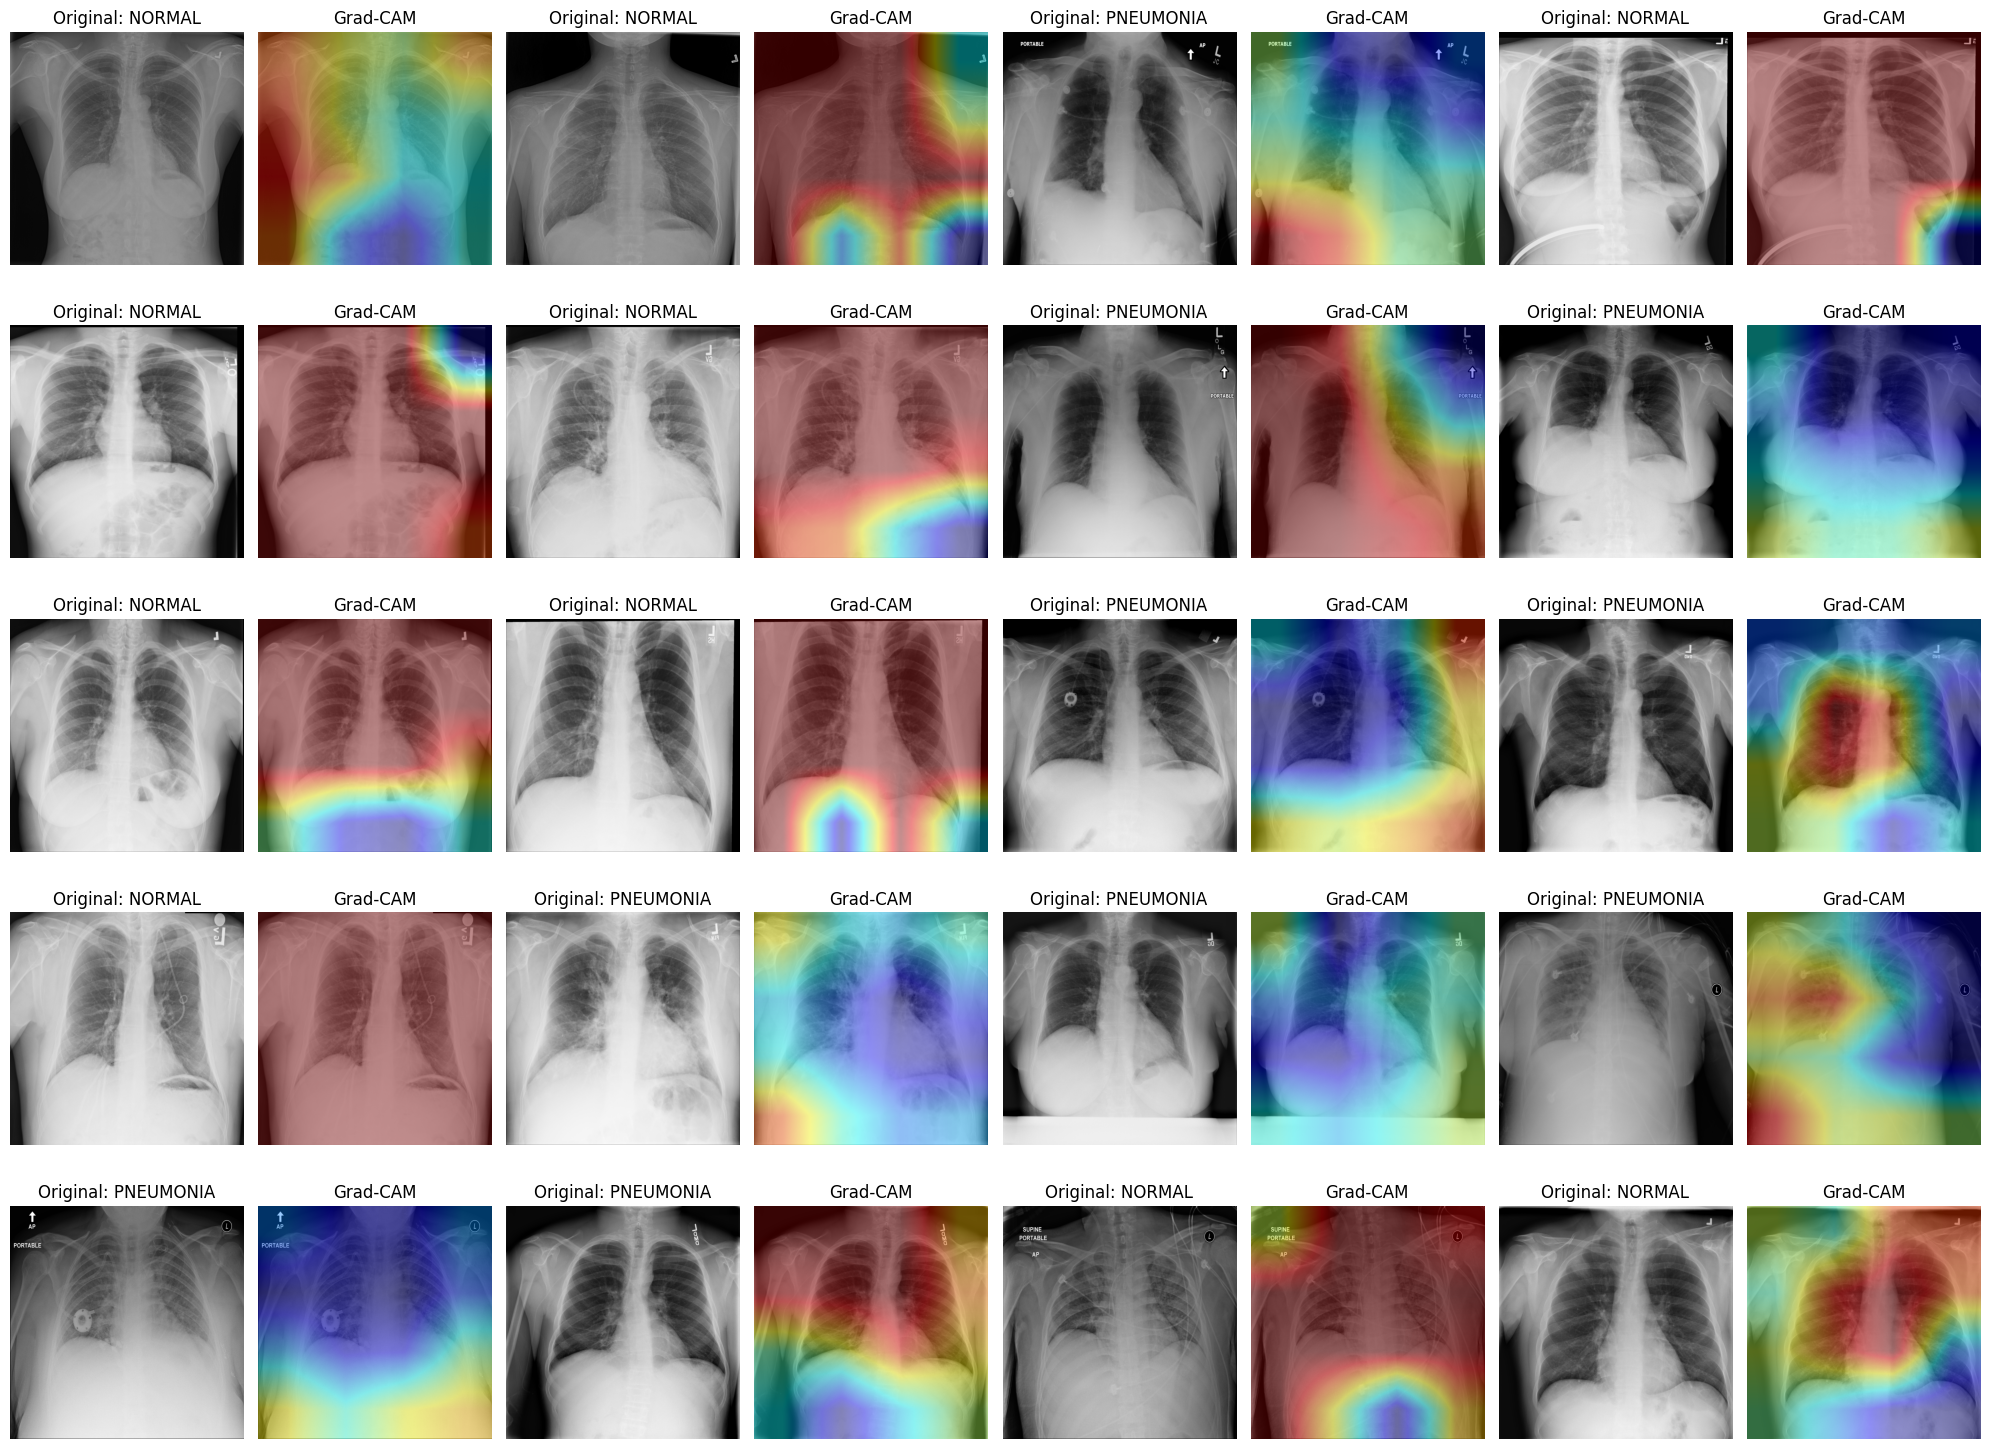

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Step 3: Load the trained model
model_path = "/content/drive/My Drive/chest_xray_model_optimized.h5"
model = load_model(model_path)
print("✅ Model loaded successfully!")

# Step 4: Define directories
normal_dir = "/content/drive/My Drive/projectoutput/val/NORMAL"
pneumonia_dir = "/content/drive/My Drive/projectoutput/val/PNEUMONIA"

def get_images(directory, count=10):
    """Randomly selects a given number of image paths from the specified directory."""
    if os.path.exists(directory):
        images = os.listdir(directory)
        random.shuffle(images)
        return [os.path.join(directory, img) for img in images[:count]]
    else:
        print(f"❌ Directory not found: {directory}")
        return []

# Step 5: Fetch 10 images each
normal_images = get_images(normal_dir, 10)
pneumonia_images = get_images(pneumonia_dir, 10)
all_images = normal_images + pneumonia_images

# Step 6: Grad-CAM function
def apply_gradcam(model, img_path, layer_name='Conv_1'):
    """Apply Grad-CAM to visualize the important regions of an X-ray image."""
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    grad_model = tf.keras.models.Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()

    for i in range(conv_outputs.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    heatmap = cv2.resize(heatmap, (128, 128))

    return heatmap

# Step 7: Visualize with Grad-CAM
plt.figure(figsize=(20, 15))  # Wider figure for more images

for i, img_path in enumerate(all_images):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)[0][0]
    label = "PNEUMONIA" if prediction > 0.5 else "NORMAL"

    heatmap = apply_gradcam(model, img_path)

    orig_img = cv2.imread(img_path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (orig_img.shape[1], orig_img.shape[0]))

    if len(orig_img.shape) == 2:
        orig_img = cv2.cvtColor(orig_img, cv2.COLOR_GRAY2RGB)

    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(orig_img, 0.6, heatmap, 0.4, 0)

    # Plot original
    plt.subplot(5, 8, 2 * i + 1)
    plt.imshow(orig_img)
    plt.title(f"Original: {label}")
    plt.axis("off")

    # Plot heatmap
    plt.subplot(5, 8, 2 * i + 2)
    plt.imshow(superimposed_img)
    plt.title("Grad-CAM")
    plt.axis("off")

plt.tight_layout()
plt.show()
